<a href="https://colab.research.google.com/github/AlexandreXavierMartins/PST/blob/main/BuscaTabuPST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solução inicial 27
Melhorou - Nova fo 24 Iter = 1
Melhorou - Nova fo 23 Iter = 2
Melhorou - Nova fo 22 Iter = 3
Melhorou - Nova fo 19 Iter = 4
Melhorou - Nova fo 17 Iter = 5
Melhorou - Nova fo 15 Iter = 6
Melhorou - Nova fo 12 Iter = 9
Solução inicial 26
Melhorou - Nova fo 21 Iter = 1
Melhorou - Nova fo 19 Iter = 2
Melhorou - Nova fo 17 Iter = 3
Melhorou - Nova fo 16 Iter = 4
Melhorou - Nova fo 15 Iter = 15
Melhorou - Nova fo 12 Iter = 16
Solução inicial 32
Melhorou - Nova fo 31 Iter = 1
Melhorou - Nova fo 30 Iter = 2
Melhorou - Nova fo 28 Iter = 3
Melhorou - Nova fo 27 Iter = 4
Melhorou - Nova fo 26 Iter = 5
Melhorou - Nova fo 23 Iter = 6
Melhorou - Nova fo 17 Iter = 7
Melhorou - Nova fo 12 Iter = 8
Solução inicial 25
Melhorou - Nova fo 24 Iter = 1
Melhorou - Nova fo 19 Iter = 2
Melhorou - Nova fo 15 Iter = 3
Solução inicial 27
Melhorou - Nova fo 25 Iter = 1
Melhorou - Nova fo 22 Iter = 2
Melhorou - Nova fo 20 Iter = 3
Melhorou - Nova fo 19 Iter = 13
Melhorou - Nova fo 17 Iter = 18
So

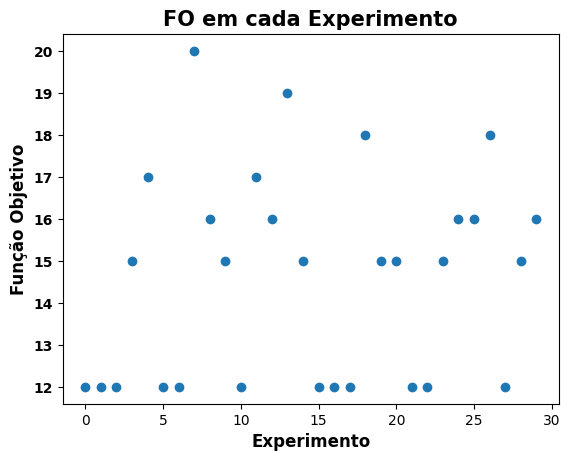

In [16]:
#Implementação BT para PST
import math
import numpy as np
import matplotlib.pyplot as plt
inf = math.inf

def gera_sol_rand(n):
  sol = np.arange(1, n)
  np.random.shuffle(sol)
  sol = np.insert(sol, 0, 0)
  return sol

def calcula_fo(sol, tempos):
  fo = 0
  for i in range(1, len(sol)):
    fo = fo + tempos[sol[i]][sol[i-1]]
  return fo



tempos =  [
           [inf, inf, inf, inf, inf, inf, inf, inf],
           [5, inf, 3, 9, 4, 2, 6, 7],
           [3, 3, inf, 6, 2, 3, 5, 4],
           [4, 9, 6, inf, 7, 2, 6, 1],
           [7, 4, 2, 7, inf, 4, 8, 2],
           [2, 2, 3, 3, 4, inf, 1, 3],
           [1, 6, 5, 5, 8, 1, inf, 5],
           [3, 7, 4, 1, 2, 3, 5, inf]
           ]
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
n = 8
#print(tempos)
TamLista = 4
BTmax = 2*n
experimentos = 30
#criar uma matriz nxn com todos os elementos iguais a zero
MatrizTabu = np.zeros((n, n))
#print(MatrizTabu)

for e in range(experimentos):
  np.random.seed(e+1)
  sol = n*[0] #Vetor para guardar a Solução
  sol_star = n*[0]
  sol = gera_sol_rand(n)
  fo = calcula_fo(sol, tempos)
  sol_star = sol.copy()
  fo_star = fo
  fo_inicial.append(fo)
  print('Solução inicial', fo)
  iter = 0
  Melhor_iter = 0
  Lista = n*[0]
  while iter - Melhor_iter < BTmax:
    iter = iter + 1
    melhor_viz = inf
    bi = -1
    for i in range(1,n-1):
      for j in range(i+1, n):
        sol[i], sol[j] = sol[j], sol[i]
        nfo = calcula_fo(sol, tempos)
        if nfo < melhor_viz and MatrizTabu[i][j] < iter:
          #print(nfo, '<', melhor_viz, '.', MatrizTabu[i][j], '<', iter)
          melhor_viz = nfo
          bi = i
          bj = j
        else:
          if nfo < fo_star:
            #print(nfo, '<', fo_star)
            melhor_viz = nfo
            bi = i
            bj = j

        sol[i], sol[j] = sol[j], sol[i]
    #Atualiza a Lista tabu
    if bi != -1:
      MatrizTabu[bi][bj] = int(iter + TamLista)
      MatrizTabu[bj][bi] = int(iter + TamLista)
      sol[bi], sol[bj] = sol[bj], sol[bi]
      fo = melhor_viz
      #print(sol, 'fo =', fo)
      if fo < fo_star:
        fo_star = fo
        Melhor_iter = iter
        sol_star = sol.copy()
        print('Melhorou - Nova fo', fo_star, 'Iter =', iter)

  #Fim While
  fo_final.append(fo_star)
  xlabel.append(e)
  media = media + fo_star


media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Experimento", fontsize = 15, fontweight = 'bold')
plt.xlabel("Experimento", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()
